In [16]:
from google.colab import files
adfile=files.upload()

Saving movieticket.csv to movieticket (1).csv


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [100]:
df=pd.read_csv("movieticket.csv")

In [101]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [102]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [103]:
df.corr()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
film_code,1.000000,0.029530,0.009802,-0.005588,-0.000920,0.076670,-0.104120,0.104820,-0.005582,0.061224,0.851380,0.800933,-0.028686
cinema_code,0.029530,1.000000,-0.012910,-0.053716,0.019534,-0.187125,0.125542,0.005079,-0.053957,-0.353402,0.051027,0.049646,-0.000270
total_sales,0.009802,-0.012910,1.000000,0.915176,0.066810,0.509812,0.414418,0.272450,0.915112,0.376134,-0.080568,-0.051433,-0.000424
tickets_sold,-0.005588,-0.053716,0.915176,1.000000,0.071498,0.522088,0.493707,0.103596,0.999946,0.425468,-0.103477,-0.062666,-0.005037
tickets_out,-0.000920,0.019534,0.066810,0.071498,1.000000,0.078860,0.044407,0.011916,0.061091,0.037599,-0.012448,-0.007210,0.004441
show_time,0.076670,-0.187125,0.509812,0.522088,0.078860,1.000000,0.055617,0.176274,0.521625,0.681645,-0.023297,-0.020643,0.007646
occu_perc,-0.104120,0.125542,0.414418,0.493707,0.044407,0.055617,1.000000,0.084666,0.493585,-0.141262,-0.145100,-0.088856,-0.011061
ticket_price,0.104820,0.005079,0.272450,0.103596,0.011916,0.176274,0.084666,1.000000,0.103544,0.004287,0.048007,0.042031,0.001113
ticket_use,-0.005582,-0.053957,0.915112,0.999946,0.061091,0.521625,0.493585,0.103544,1.000000,0.425370,-0.103418,-0.062634,-0.005087
capacity,0.061224,-0.353402,0.376134,0.425468,0.037599,0.681645,-0.141262,0.004287,0.425370,1.000000,-0.025265,-0.023940,0.006255


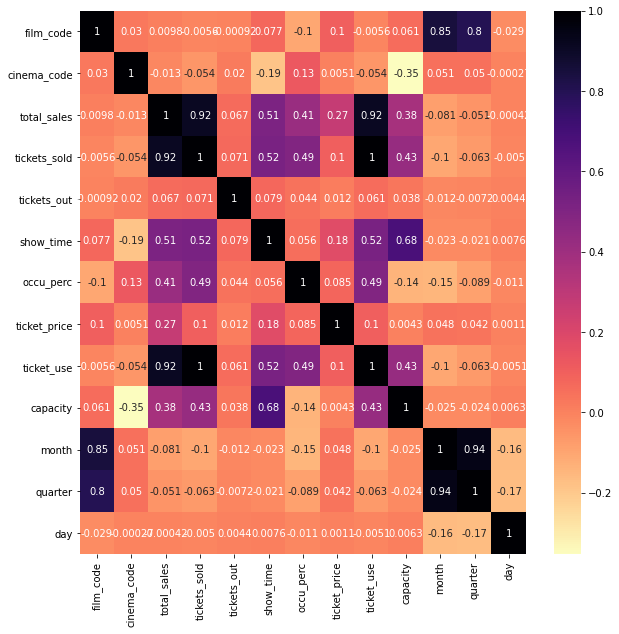

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='magma_r')
plt.show()

# **Checking For null values**


In [105]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [106]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [108]:
df['capacity'].fillna(df['capacity'].mean(),inplace=True)

In [109]:
df['occu_perc'].fillna(df['occu_perc'].mean(),inplace=True)

In [110]:
df.isna().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [111]:
df.drop(['film_code','cinema_code','total_sales','tickets_sold','tickets_out','ticket_use','month','quarter','day'],axis=1,inplace=True)

In [112]:
df

,show_time,occu_perc,ticket_price,capacity,date
0,4,4.26,150000.0,610.328638,2018-05-05
1,5,8.08,80000.0,519.801980,2018-05-05
2,4,20.00,80000.0,160.000000,2018-05-05
3,1,11.01,100000.0,108.991826,2018-05-05
4,3,16.67,80000.0,89.982004,2018-05-05
...,...,...,...,...,...
142519,2,3.86,60000.0,569.948187,2018-11-04
142520,1,65.22,80000.0,22.999080,2018-11-04
142521,3,9.20,132500.0,86.956522,2018-11-04
142522,2,5.00,120000.0,100.000000,2018-11-04


In [113]:
df.corr() 

,show_time,occu_perc,ticket_price,capacity
show_time,1.000000,0.055603,0.176274,0.681474
occu_perc,0.055603,1.000000,0.084631,-0.141262
ticket_price,0.176274,0.084631,1.000000,0.004285
capacity,0.681474,-0.141262,0.004285,1.000000


In [114]:
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [115]:
df_cat

,date
0,2018-05-05
1,2018-05-05
2,2018-05-05
3,2018-05-05
4,2018-05-05
...,...
142519,2018-11-04
142520,2018-11-04
142521,2018-11-04
142522,2018-11-04


In [116]:
df_num

,show_time,occu_perc,ticket_price,capacity
0,4,4.26,150000.0,610.328638
1,5,8.08,80000.0,519.801980
2,4,20.00,80000.0,160.000000
3,1,11.01,100000.0,108.991826
4,3,16.67,80000.0,89.982004
...,...,...,...,...
142519,2,3.86,60000.0,569.948187
142520,1,65.22,80000.0,22.999080
142521,3,9.20,132500.0,86.956522
142522,2,5.00,120000.0,100.000000


In [117]:
le=LabelEncoder()
df_cat['date']=le.fit_transform(df_cat['date'])

In [118]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [119]:
x=df_new.drop(['ticket_price'],axis=1)
y=df_new['ticket_price']

In [120]:
x

,show_time,occu_perc,capacity,date
0,4,4.26,610.328638,54
1,5,8.08,519.801980,54
2,4,20.00,160.000000,54
3,1,11.01,108.991826,54
4,3,16.67,89.982004,54
...,...,...,...,...
142519,2,3.86,569.948187,233
142520,1,65.22,22.999080,233
142521,3,9.20,86.956522,233
142522,2,5.00,100.000000,233


In [121]:
y

0         150000.0
1          80000.0
2          80000.0
3         100000.0
4          80000.0
            ...   
142519     60000.0
142520     80000.0
142521    132500.0
142522    120000.0
142523     50000.0
Name: ticket_price, Length: 142524, dtype: float64

In [122]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123)

R2 Score 0.059313145600033534


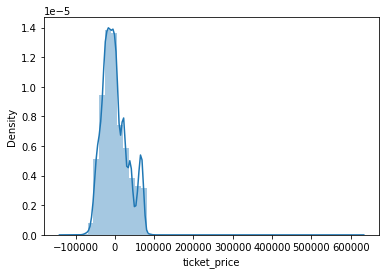

In [123]:
lr= LinearRegression()
lr.fit(xtrain,ytrain)
yhat=lr.predict(xtest)
residual=ytest-yhat
sns.distplot(residual)
print("R2 Score",r2_score(ytest,yhat))

In [124]:
for i in range(2,9):
  pf=PolynomialFeatures(i)
  x_poly=pf.fit_transform(x)
  xtrain,xtest,ytrain,ytest=train_test_split(x_poly,y,test_size=0.3,random_state=123)
  lr= LinearRegression()
  lr.fit(xtrain,ytrain) 
  yhat=lr.predict(xtest)
  print("R2 Score ",i," ",r2_score(ytest,yhat))

R2 Score  2   0.08146289451423494
R2 Score  3   0.11134678745925919
R2 Score  4   0.11992679613788804
R2 Score  5   0.04323100669209334
R2 Score  6   0.03677252595517744
R2 Score  7   -0.1311247746328823
R2 Score  8   -0.18601818913365253


R2 Score  8   0.11992679613788804


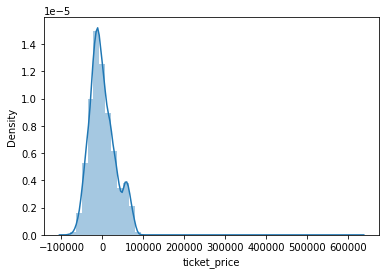

In [125]:
pf=PolynomialFeatures(4)
x_poly=pf.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x_poly,y,test_size=0.3,random_state=123)
lr= LinearRegression()
lr.fit(xtrain,ytrain) 
yhat=lr.predict(xtest)
residuals=ytest-yhat
sns.distplot(residuals)
print("R2 Score ",i," ",r2_score(ytest,yhat))

[15:54:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score  8   0.22451785610637098


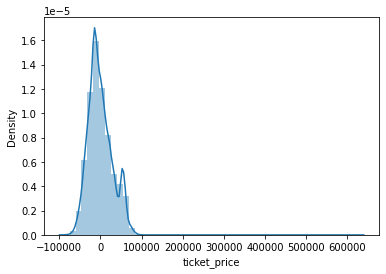

In [127]:
xgb=XGBRegressor(base_estinamtor=LinearRegression())
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123)
xgb.fit(xtrain,ytrain)
yhat=xgb.predict(xtest)
residuals=ytest-yhat
sns.distplot(residuals)
print("R2 Score ",i," ",r2_score(ytest,yhat))